## 读取数据

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
ad_data = pd.read_csv('data/ad_result.csv')

In [5]:
ad_data.head()

,month,tvcm,magazine,install
0,2013-01,6358,5955,53948
1,2013-02,8176,6069,57300
2,2013-03,6853,5862,52057
3,2013-04,5271,5247,44044
4,2013-05,6473,6365,54063


## 数据分析

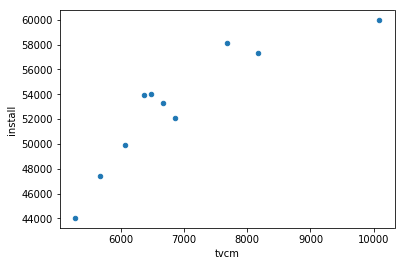

In [6]:
ad_data.plot.scatter('tvcm', 'install')

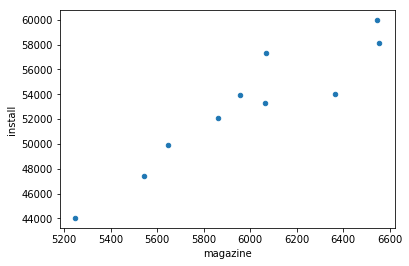

In [7]:
ad_data.plot.scatter('magazine', 'install')

## 多元线性回归分析

### Statsmodels

In [8]:
import statsmodels.api as sm

In [9]:
x = ad_data[['tvcm', 'magazine']]
y = ad_data['install']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

D:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                install   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     52.86
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           5.97e-05
Time:                        18:49:26   Log-Likelihood:                -84.758
No. Observations:                  10   AIC:                             175.5
Df Residuals:                       7   BIC:                             176.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.1743   7719.131      0.024      0.981   -1.81e+04    1.84e+04
tvcm           1.3609      0.517      2.630      0.034       0.137       2.584
magazine       7.2498      1.693      4.283      0.004       3.247      11.252
==============================================================================
Omnibus:                        0.992   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.795
Skew:                           0.534   Prob(JB):                        0.672
Kurtosis:                       2.124   Cond. No.                     1.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# model.summary2()

### sklearn

In [11]:
from sklearn import linear_model

In [12]:
x = ad_data[['tvcm', 'magazine']]
y = ad_data['install']

lm = linear_model.LinearRegression()
model = lm.fit(x, y)

In [13]:
predictions = lm.predict(x)

In [14]:
print(predictions[0:5])

[52013.52540763 55314.1585791  52012.94920149 45401.33907315
 55142.45310907]


In [15]:
lm.score(x,y)

0.9379014301044469

In [16]:
lm.coef_

array([1.3609213 , 7.24980915])

In [17]:
lm.intercept_

188.174274830395